# Upload files in Google Colab
If you are running this Jupyter Notebook on Google Colab, run this cell to upload the data files (train_inputs.csv, train_targets.csv, test_inputs.csv, test_targets.csv) in the colab virtual machine.  You will be prompted to select files that you would like to upload. 

If you are running this Jupyter Notebook on your computer, you do not need to run this cell.

In [ ]:
from google.colab import files
uploaded = files.upload()
%ls

# Import libraries 
Do not use any other Python library.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Function: load_linear_regression_data

This function loads the data for Linear Regression from a local drive into RAM

Outputs:

*   **train_inputs**: numpy array of N training data points x M features
*   **train_targets**: numpy array of N training targets
*   **test_inputs**: numpy array of N' test data points x M features
*   **test_targets**: numpy array of N' test targets

In [25]:
def load_linear_regression_data():
  test_inputs = np.genfromtxt('regression-dataset/test_inputs.csv', delimiter=',')
  test_targets = np.genfromtxt('regression-dataset/test_targets.csv', delimiter=',')
  train_inputs = np.genfromtxt('regression-dataset/train_inputs.csv', delimiter=',')
  train_targets = np.genfromtxt('regression-dataset/train_targets.csv', delimiter=',')
  return train_inputs, train_targets, test_inputs, test_targets


# Function: predict_linear_regression

This function uses a vector of weights to make predictions for a set of inputs.

Inputs:
*   **inputs**: matrix of input data points for which we want to make a prediction (numpy array of N data points x M+1 features)
*   **weights**: vector of weights (numpy array of M+1 weights)

Output:
*   **predicted_values**: vector of predicted values (numpy array of N floats)

In [26]:
def predict_linear_regression(inputs, weights):

  # dummy assignment until the function is filled in
  predicted_values = np.zeros(inputs.shape[0])
    
  predicted_values = weights.dot(np.transpose(inputs))

  return predicted_values

# Function eval_linear_regression

This function evaluates a set of predictions by computing the mean squared error with respect to the targets

Inputs:
*   **inputs**: matrix of input data points for which we will evaluate the predictions (numpy array of N data points x M+1 features)
*   **weights**: vector of weights (numpy array of M+1 weights)
*   **targets**: vector of targets associated with the inputs (numpy array of N targets)

Output:
*   **mean_squared_error**: mean squared error between the predicted values and the targets (scalar)

In [27]:
def eval_linear_regression(inputs, weights, targets):

  # dummy assignment until the function is filled in
  mean_squared_error = 0
  mean_squared_error = np.average((targets - predict_linear_regression(inputs, weights)) ** 2) 
  
  return mean_squared_error

# Function train_linear_regression

This function optimizes a set of weights for linear regression based on a training set

Inputs:
*   **train_inputs**: matrix of input training points (numpy array of N data points x M+1 features)
*   **train_targets**: vector of targets associated with the inputs (numpy array of N targets)
*   **lambda_hyperparam**: lambda hyperparameter used to adjust the importance of the regularizer (scalar)

Output:
*   **weights**: vector of weights that have been optimized (numpy array of M+1 weights)



In [28]:
def train_linear_regression(train_inputs, train_targets, lambda_hyperparam):

  # dummy assignment until the function is filled in
  # weights = np.zeros(train_inputs.shape)
  x_bar = np.transpose(train_inputs)
  A = x_bar.dot(np.transpose(x_bar)) 
  b = np.sum(train_targets * x_bar, axis=1)
  weights = np.linalg.inv(A + lambda_hyperparam*np.eye(len(A))).dot(b)
  return weights

# Function cross_validation_linear_regression

This function performs k-fold cross validation to determine the best lambda hyperparameter in linear regression

Inputs:
*   **k_folds**: # of folds in cross-validation (integer)
*   **hyperparameters**: list of hyperparameters where each hyperparameter is a different lambda value (list of floats)
*   **inputs**: matrix of input points (numpy array of N data points by M+1 features)
*   **targets**: vector of targets associated with the inputs (numpy array of N targets)

Outputs:
*   **best_hyperparam**: best lambda value for linear regression (float)
*   **best_mean_squared_error**: mean squared error achieved with best_hyperparam (float)
*   **mean_squared_errors**: vector of mean squared errors for the corresponding hyperparameters (numpy array of floats)



In [29]:
def cross_validation_linear_regression(k_folds, hyperparameters, inputs, targets):

  # dummy assignments until the function is filled in
  best_hyperparam = 0
  best_mean_squared_error = 0
  mean_squared_errors = np.zeros(len(hyperparameters))
  mean_squared_error = 0
    
  val_dataset = [None] * k_folds
  val_target = [None] * k_folds
  train_dataset = [None] * k_folds
  train_target = [None] * k_folds
    
  for k in range(k_folds):
    split_inputs = np.split(inputs, k_folds)
    split_targets = np.split(targets, k_folds)
    val_dataset[k] = split_inputs[k]
    val_target[k] = split_targets[k]
    
    if(k != 0 and k != k_folds-1):
        train_dataset[k] = np.concatenate((split_inputs[0:k], split_inputs[k+1:]))
        train_target[k] = np.concatenate((split_targets[0:k], split_targets[k+1:]))
    elif k == 0:
        train_dataset[k] = np.asarray(split_inputs[k+1:])
        train_target[k] = np.asarray(split_targets[k+1:])
    elif k == k_folds-1:
        train_dataset[k] = np.asarray(split_inputs[0:k])
        train_target[k] = np.asarray(split_targets[0:k])
        
    train_dataset[k] = train_dataset[k].reshape(train_dataset[k].shape[0]*train_dataset[k].shape[1], train_dataset[k].shape[2])
    train_target[k] = train_target[k].reshape(train_target[k].shape[0]*train_target[k].shape[1])
    
    
  for lambda_index in range(len(hyperparameters)):
    mean_squared_error = 0
    lambda_hyperparam = hyperparameters[lambda_index]
    for k in range(k_folds):
        weights = train_linear_regression(train_dataset[k], train_target[k], lambda_hyperparam)
        mean_squared_error += eval_linear_regression(val_dataset[k], weights, val_target[k])
    mean_squared_error /= k_folds
    mean_squared_errors[lambda_index] = mean_squared_error
  
  best_hyperparam = mean_squared_errors.argmin()
  best_mean_squared_error = mean_squared_errors[best_hyperparam]
    
  return best_hyperparam, best_mean_squared_error, mean_squared_errors

# Function: plot_linear_regression_mean_squared_errors

Function that plots the mean squared errors for different lambda values (hyperparameters) in linear regression based on cross validation

Inputs:
*   **mean_squared_errors**: vector of mean squared errors for the corresponding hyperparameters (numpy array of floats)
*   **hyperparams**: list of hyperparameters where each hyperparameter is a different lambda value (list of floats)

In [30]:
def plot_linear_regression_mean_squared_errors(mean_squared_errors,hyperparams):
  plt.plot(hyperparams,mean_squared_errors)
  plt.ylabel('mean squared error')
  plt.xlabel('lambda')
  plt.show()

# Main Linear Regression code

Load data.
Use k-fold cross validation to find the best lambda value for linear regression.
Plot mean squared errors for different lambda values.
Test linear regression with the best lambda value.

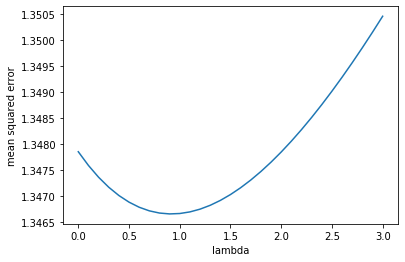

best lambda: 9
best cross validation mean squared error: 1.346657677202169
test mean squared error: 1.4823465780773883


In [31]:
# load data
train_inputs, train_targets, test_inputs, test_targets = load_linear_regression_data()

# add 1 at the end of each data point
train_inputs = np.concatenate((train_inputs,np.ones((train_inputs.shape[0],1))),1)
test_inputs = np.concatenate((test_inputs,np.ones((test_inputs.shape[0],1))),1)

# lambda values to be evaluated by cross validation
hyperparams = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
k_folds = 10
best_lambda, best_mean_squared_error, mean_squared_errors = cross_validation_linear_regression(k_folds,hyperparams,train_inputs,train_targets)

# plot results
plot_linear_regression_mean_squared_errors(mean_squared_errors,hyperparams)
print('best lambda: ' + str (best_lambda))
print('best cross validation mean squared error: ' + str(best_mean_squared_error))

# train and evaluate with best lambda
weights = train_linear_regression(train_inputs,train_targets,best_lambda)
mean_squared_error = eval_linear_regression(test_inputs, weights, test_targets)
print('test mean squared error: ' + str(mean_squared_error))

